In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [ ]:
df = pd.read_csv(".csv")
df.head()

In [ ]:
df_cleaned = df.drop(["columnUseless1","columnUseless2"],axis=1)
df_cleaned.head()

In [ ]:
#If there are categorical variables like Countries etc.
df_v1 = pd.get_dummies(df_cleaned, drop_first=True)
df_v1.head()

In [ ]:
y = df_v1["target"]
X = df_v1.copy()
X = X.drop("target",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
dt_pred = decision_tree.predict(X_test)

In [4]:
#Defining a confusion matrix function to stop doing it all the time.
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_ )
    disp.plot()
    plt.show()

In [ ]:
conf_matrix_plot(decision_tree, X_test, y_test)

In [ ]:
#Plotting the tree
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, class_names={0:"stayed",1:"churned"}, filled=True);
plt.show

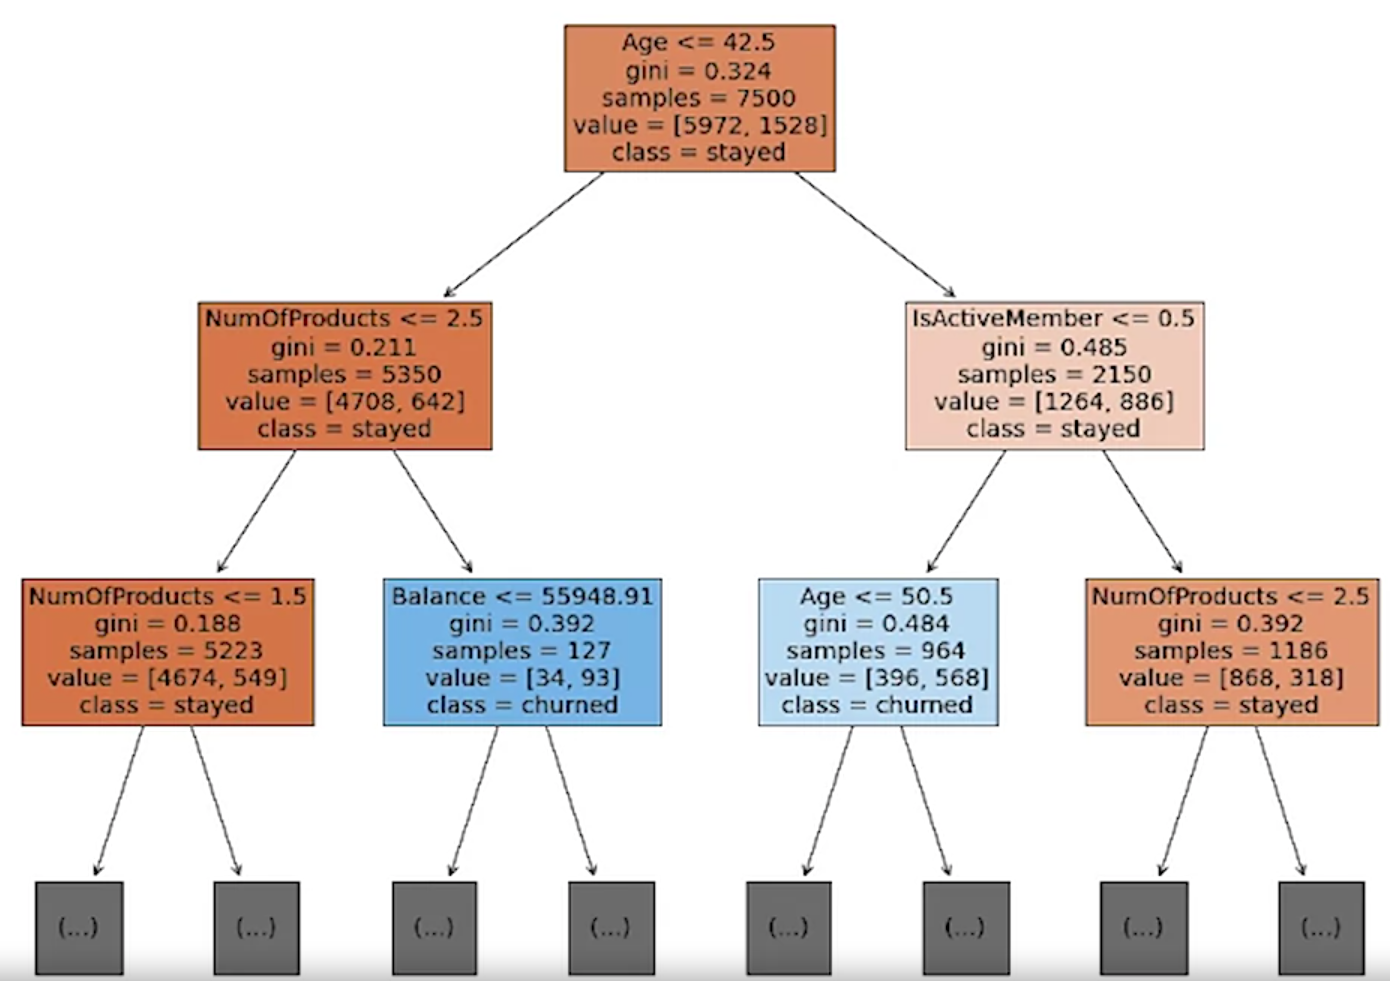

In [7]:
# After a model is created we can tune the hyperparameters.
# Max depth (Max Levels of the model), Min samples leaf, min samples split, 
# For this we can use GridSearch



In [8]:
from sklearn.model_selection import GridSearchCV

In [10]:
#Defining parameters to test
tree_para = {"max_depth":[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
              "min_samples_leaf": [2,5,10,20,50]}
scoring = {"accuracy","precision","recall","f1"}

In [11]:
tuned_decision_tree = DecisionTreeClassifier(random_state=42)
clf=GridSearchCV(tuned_decision_tree,
                 tree_para,
                 scoring=scoring,
                 cv=5,
                 refit="f1")
clf.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [12]:
clf.best_estimator_


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
#Best score with 4 decimals
print("Best Avg.Validation score: ", "%.4f" % clf.best_score_)

In [13]:
#We can arrange the results in a dataframe, as a function for reusing later
results = pd.DataFrame(columns=["Model","F1","Recall","Precision","Accuracy"])
def make_results(model_name, model_object):
    #Note: Model_Name is just a string for the name.
    cv_results = pd.DataFrame(model_object.cv_results_)
    #Calling just the one with highest mean f1
    best_estimator_results = cv_results.iloc[cv_results["mean_test_f1"].idxmax(),:]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    data = pd.DataFrame()
    data = data.append({"Model": model_name, "F1": f1, "Precision": precision, "Accuracy": accuracy}, ignore_index=True)
    return data

In [ ]:
results_table = make_results("Tuned Tree", clf)
results_table.to_csv("Results.csv")
results_table